In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from kernel import *
from sklearn.mixture import GaussianMixture

In [6]:
x_df=pd.read_csv("kkm1.csv")
x_df

,Unnamed: 0,V1,V2
0,1,0.937355,0.018364
1,2,0.978768,0.242653
2,3,0.846719,0.583674
3,4,0.484824,0.615696
4,5,0.243866,1.063784
5,6,0.009318,1.074798
6,7,-0.339713,0.910160
7,8,-0.725097,0.777518
8,9,-0.840707,0.470567
9,10,-1.025790,0.158663


In [120]:
def kernel_kmeans(x, kernel, k):
    K = kernel_mat(kernel, x)
    L, U = np.linalg.eig(K)
    uk = np.real(U[:, :k])
    
    em_cluster = GaussianMixture(n_components=k)
    em_cluster.fit(uk)
    return uk, em_cluster.predict(uk)

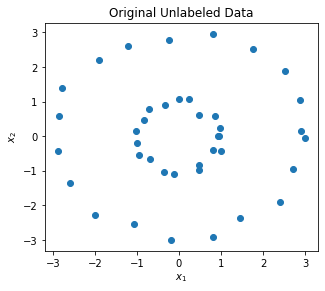

In [164]:
x = x_df.to_numpy()[:, 1:]
plt.figure(figsize=(14*0.7/2, 6*0.7))
plt.scatter(*x.T)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Original Unlabeled Data")
plt.savefig("../img/original_data.eps")
plt.show()

In [149]:
def plot_cluster(x, kernel, k):
    fig, ax = plt.subplots(figsize=(14*0.7, 6*0.7),ncols = 2, nrows=1)
    uk, labels = kernel_kmeans(x, kernel, k)
    for ki in range(0, k):
        ax[1].scatter(*x[labels==ki,:].T)
        ax[1].set_title("Labels in Original Space")
        ax[1].set_xlabel("$x_1$")
        ax[1].set_ylabel("$x_2$")
    for ki in range(0, k):
        ax[0].scatter(*uk[labels==ki,:].T)
        ax[0].set_title("Kernel EM Clustering in Feature Space")
        ax[0].set_xlabel("$v_1$")
        ax[0].set_ylabel("$v_2$")
    return fig, ax


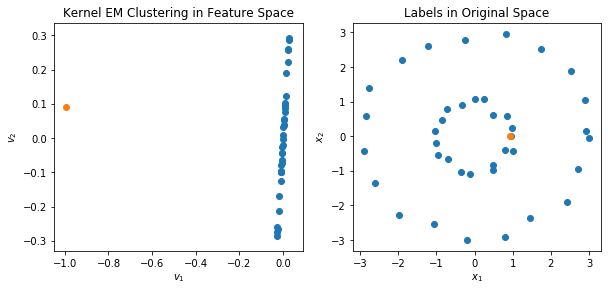

In [156]:
k=2
uk, labels = kernel_kmeans(x, lambda x,y: np.dot(x, y), k)
fig, ax = plot_cluster(x, lambda x,y: np.dot(x,y), 2)
plt.show()


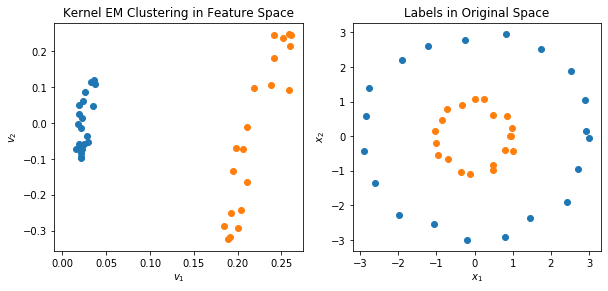

In [166]:
k=2
fig, ax = plot_cluster(x, lambda x,y: k_gaussian(x,y,1), 2)
plt.savefig("../img/gaussian_1.eps")
plt.show()


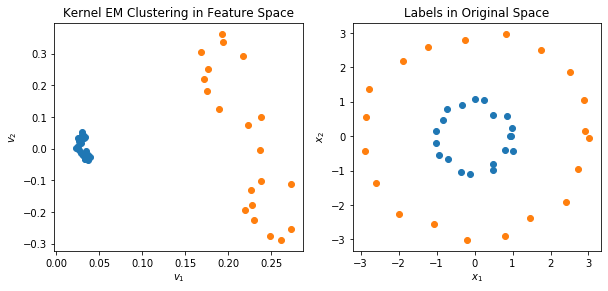

In [167]:
k=2
fig, ax = plot_cluster(x, lambda x,y: k_polynomial(x,y,2), 2)
plt.savefig("../img/polynomial_2.eps")
plt.show()